cardiovascular health

In [3]:
! pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=20bba30cddda75e6291834e175d8d0fd74667389816141a12a2292d959b93b28
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Risk of Heart Condition: 82.38


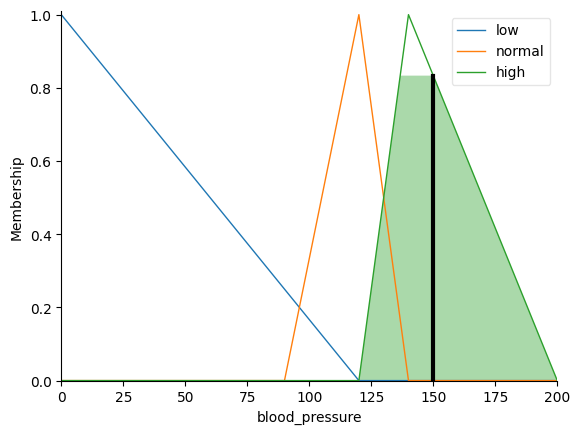

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input variables
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure')
cholesterol = ctrl.Antecedent(np.arange(0, 401, 1), 'cholesterol')
heart_rate = ctrl.Antecedent(np.arange(50, 151, 1), 'heart_rate')

# Define output variable
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Define membership functions for blood pressure
blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [0, 0, 120])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 120, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [120, 140, 200])

# Define membership functions for cholesterol
cholesterol['low'] = fuzz.trimf(cholesterol.universe, [0, 0, 200])
cholesterol['normal'] = fuzz.trimf(cholesterol.universe, [150, 200, 250])
cholesterol['high'] = fuzz.trimf(cholesterol.universe, [200, 300, 400])

# Define membership functions for heart rate
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [50, 50, 70])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 75, 90])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [80, 100, 150])

# Define membership functions for risk
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 30])
risk['medium'] = fuzz.trimf(risk.universe, [20, 50, 80])
risk['high'] = fuzz.trimf(risk.universe, [60, 100, 100])

# Define the rules
rule1 = ctrl.Rule(blood_pressure['low'] & cholesterol['low'] & heart_rate['low'], risk['low'])
rule2 = ctrl.Rule(blood_pressure['normal'] & cholesterol['normal'] & heart_rate['normal'], risk['medium'])
rule3 = ctrl.Rule(blood_pressure['high'] & cholesterol['high'] & heart_rate['high'], risk['high'])
rule4 = ctrl.Rule(blood_pressure['high'] & cholesterol['normal'] & heart_rate['high'], risk['high'])
rule5 = ctrl.Rule(blood_pressure['normal'] & cholesterol['high'] & heart_rate['normal'], risk['medium'])
rule6 = ctrl.Rule(blood_pressure['low'] & cholesterol['high'] & heart_rate['low'], risk['medium'])

# Create control system and simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

# Input values for simulation
risk_sim.input['blood_pressure'] = 150
risk_sim.input['cholesterol'] = 220
risk_sim.input['heart_rate'] = 85

# Perform simulation
risk_sim.compute()

# Output the result
print(f"Risk of Heart Condition: {risk_sim.output['risk']:.2f}")

# Visualize the result
import matplotlib.pyplot as plt

blood_pressure.view(sim=risk_sim)


plt.show()


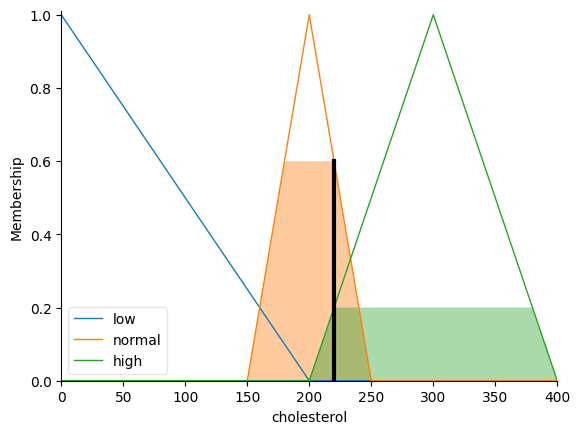

In [ ]:
cholesterol.view(sim=risk_sim)


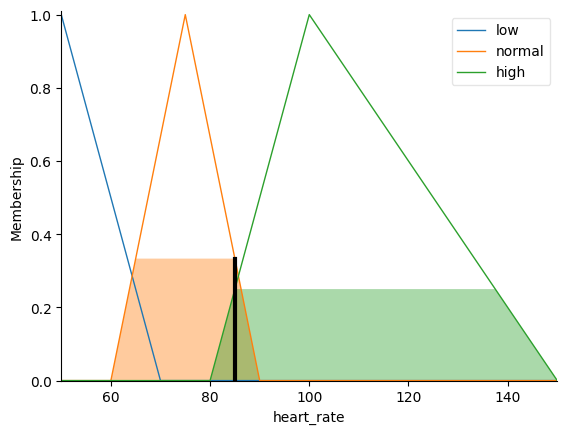

In [ ]:
heart_rate.view(sim=risk_sim)

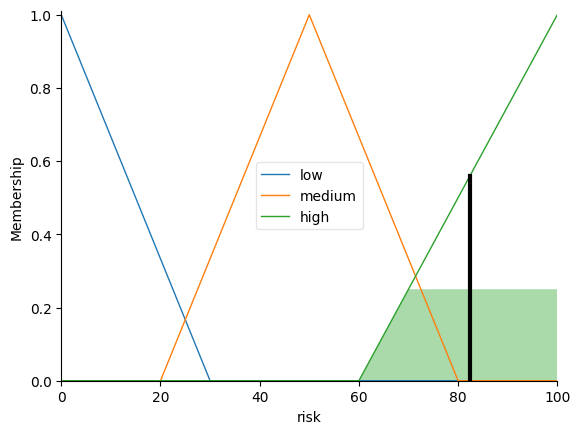

In [ ]:
risk.view(sim=risk_sim)